In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
# "https://stats.idre.ucla.edu/stat/data/binary.csv"

In [3]:
#Exploring our data and visualization
#Train and create a logistic regression model
#Evaluate our model (precision, F1 Score,..)
#What if we consider less features??

In [4]:
data = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

In [5]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [6]:
data.tail()

,admit,gre,gpa,rank
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [8]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [9]:
# data visualization

Text(0.5, 0, 'GPA')

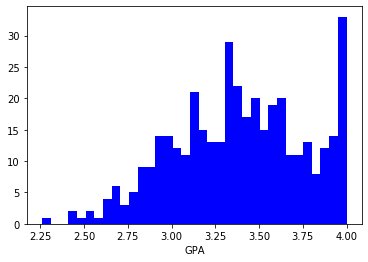

In [10]:
plt.hist(data['gpa'], bins=35, color='blue')
plt.xlabel('GPA')

Text(0.5, 0, 'GRE')

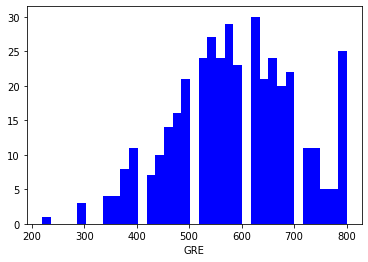

In [11]:
plt.hist(data['gre'], bins=35, color='blue')
plt.xlabel('GRE')

(array([273.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 127.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

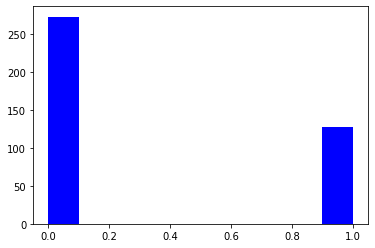

In [12]:
plt.hist(data['admit'], color='blue')

(array([ 61.,   0.,   0., 151.,   0.,   0., 121.,   0.,   0.,  67.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

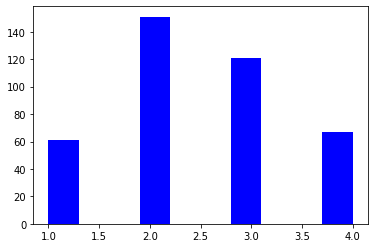

In [13]:
plt.hist(data['rank'], color='blue')

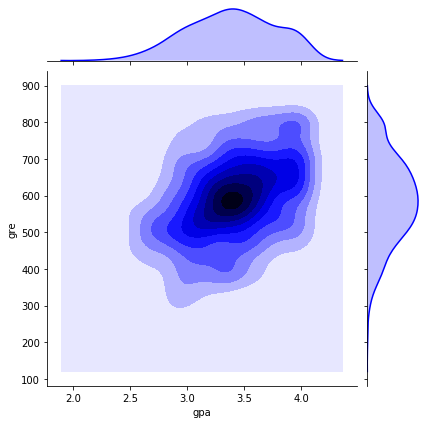

In [14]:
sns.jointplot(x='gpa', y='gre', data=data, color='blue', kind='kde')

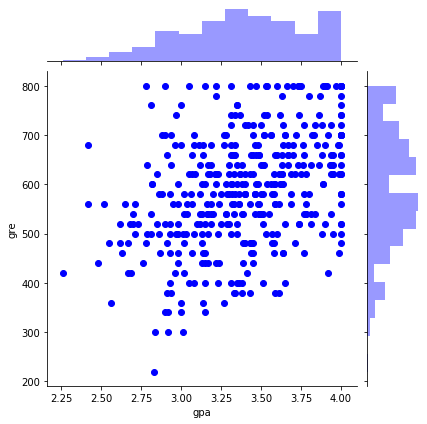

In [15]:
sns.jointplot(x='gpa', y='gre', data=data, color='blue')

In [16]:
dummy_ranks = pd.get_dummies(data['rank'], prefix='rank')

In [17]:
dummy_ranks.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [18]:
dummy_ranks.tail()

,rank_1,rank_2,rank_3,rank_4
395,0,1,0,0
396,0,0,1,0
397,0,1,0,0
398,0,1,0,0
399,0,0,1,0


In [19]:
cols_we_need = ['admit', 'gre', 'gpa']

In [20]:
data = data[cols_we_need].join(dummy_ranks.ix[:,'rank_2':])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [21]:
data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


# Lets build our Logistic Regression Model

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = data[['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4']]
y = data['admit']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 27)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()

In [27]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
prediction = model.predict(x_test)

# Evaluating our model

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        81
           1       0.60      0.23      0.33        39

    accuracy                           0.70       120
   macro avg       0.66      0.58      0.57       120
weighted avg       0.68      0.70      0.65       120



# Let's build a second model using gre and gpa as features

In [32]:
data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [33]:
x = data[['gre', 'gpa']]
y = data['admit']

In [34]:
print(x.shape)

(400, 2)


In [35]:
print(y.shape)

(400,)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

In [37]:
print(x_train.shape, x_test.shape)

(280, 2) (120, 2)


In [38]:
print(y_train.shape, y_test.shape)

(280,) (120,)


In [39]:
model2 = LogisticRegression()

In [40]:
model2.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
prediction2 = model2.predict(x_test)

In [42]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        77
           1       0.00      0.00      0.00        43

    accuracy                           0.64       120
   macro avg       0.32      0.50      0.39       120
weighted avg       0.41      0.64      0.50       120



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
